In [89]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

In [111]:
def seir(y, time, g, k, r):
    S, E, I, R = y
    #r = (2*np.sin(time/5))**2
    N = y.sum() #total population, just keep it 1
    b = r[time] * g #day^-1, 
    
    dS = (-b * S * I/N)
    dE = ( b * S * I/N) - (k * E)
    dI = (k * E) - (g * I)
    dR = (g * I)
    
    dydt=[dS,dE,dI,dR]
    return dydt

In [112]:
y = np.zeros(4) # S, E, I, R
y[0] = .99 #Susceptible
y[1] = 0 #Exposed
y[2] = .01 #Infectious
y[3] = 0 #Recovered

g = 1/4 #day^-1, recovery rate
k = 1/3 #day^-1, incubation
#r = 2   #dimentionless, reproduction number

tstop = 100 #days
tstep = 10 * tstop
t = np.linspace(0, tstop, tstep) 

In [117]:
#build r time dependance for non coupled r
r = {}
for i, time in enumerate(t):
    r[str(time)] = 2*np.sin(t[i]/5)**2
#rList = [r[time] for time in t]
r

{'0.0': 0.0,
 '0.1001001001001001': 0.0008014953145248458,
 '0.2002002002002002': 0.0032046964686209736,
 '0.3003003003003003': 0.007205751153358643,
 '0.4004004004004004': 0.012798245715571907,
 '0.5005005005005005': 0.019973215438884532,
 '0.6006006006006006': 0.028719158914066317,
 '0.7007007007007008': 0.039022056475684366,
 '0.8008008008008008': 0.05086539267549533,
 '0.9009009009009009': 0.06423018275655422,
 '1.001001001001001': 0.07909500308560193,
 '1.1011011011011012': 0.09543602549494844,
 '1.2012012012012012': 0.11322705547880248,
 '1.3013013013013013': 0.13243957418281885,
 '1.4014014014014016': 0.15304278411955444,
 '1.5015015015015016': 0.17500365853655242,
 '1.6016016016016017': 0.19828699435791663,
 '1.7017017017017018': 0.22285546861451233,
 '1.8018018018018018': 0.24866969827233615,
 '1.9019019019019021': 0.27568830336315064,
 '2.002002002002002': 0.3038679733161849,
 '2.1021021021021022': 0.33316353638457485,
 '2.2022022022022023': 0.3635280320552488,
 '2.3023023023

In [114]:
sol = sp.odeint(seir, y, t, (g, k, r))

KeyError: 1.2219266028784143e-05

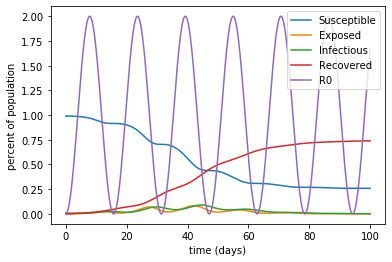

In [102]:
plt.figure(1)
plt.plot(t, sol[:, 0], label = 'Susceptible')
plt.plot(t, sol[:, 1], label = 'Exposed')
plt.plot(t, sol[:, 2], label = 'Infectious')
plt.plot(t, sol[:, 3], label = 'Recovered')
plt.plot(t, rList, label = 'R0')
plt.xlabel('time (days)')
plt.ylabel('percent of population')
plt.legend()